In [2]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score, f1_score, make_scorer
)
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


In [3]:
import os
import pandas as pd

notebook_dir = os.getcwd()   

notebooks_folder = os.path.dirname(notebook_dir)

project_root = os.path.dirname(notebooks_folder)

data_path = os.path.join(project_root, "Data", "DataAfterPrepared_WithoutDropColumns.csv")

df = pd.read_csv(data_path)

df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,is_long_term
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,1
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0


In [4]:
df['Churn'] = df['Churn'].replace({"Yes": 1, "No": 0})

/tmp/ipykernel_1680/196801821.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn'] = df['Churn'].replace({"Yes": 1, "No": 0})


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7021 entries, 0 to 7020
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   object 
 1   SeniorCitizen     7021 non-null   int64  
 2   Partner           7021 non-null   object 
 3   Dependents        7021 non-null   object 
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   object 
 6   MultipleLines     7021 non-null   object 
 7   InternetService   7021 non-null   object 
 8   OnlineSecurity    7021 non-null   object 
 9   OnlineBackup      7021 non-null   object 
 10  DeviceProtection  7021 non-null   object 
 11  TechSupport       7021 non-null   object 
 12  StreamingTV       7021 non-null   object 
 13  StreamingMovies   7021 non-null   object 
 14  Contract          7021 non-null   object 
 15  PaperlessBilling  7021 non-null   object 
 16  PaymentMethod     7021 non-null   object 


In [6]:
objects_columns = df.select_dtypes(include = "object").columns

In [7]:
objects_columns.tolist()

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [8]:
from sklearn.preprocessing import LabelEncoder

encoders = {}

for column in objects_columns:
    label_encoder = LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])
    encoders[column] = label_encoder

In [9]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7021 entries, 0 to 7020
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   int64  
 1   SeniorCitizen     7021 non-null   int64  
 2   Partner           7021 non-null   int64  
 3   Dependents        7021 non-null   int64  
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   int64  
 6   MultipleLines     7021 non-null   int64  
 7   InternetService   7021 non-null   int64  
 8   OnlineSecurity    7021 non-null   int64  
 9   OnlineBackup      7021 non-null   int64  
 10  DeviceProtection  7021 non-null   int64  
 11  TechSupport       7021 non-null   int64  
 12  StreamingTV       7021 non-null   int64  
 13  StreamingMovies   7021 non-null   int64  
 14  Contract          7021 non-null   int64  
 15  PaperlessBilling  7021 non-null   int64  
 16  PaymentMethod     7021 non-null   int64  


In [11]:
import pickle
with open("encoder.pkl", "wb") as f:
    pickle.dump(encoders, f)

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [14]:
df['Churn'].value_counts()

Churn
0    5164
1    1857
Name: count, dtype: int64

In [15]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression


In [16]:
X = df.drop(columns = ['Churn'])
y = df['Churn']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [18]:
y_train.value_counts()

Churn
0    4111
1    1505
Name: count, dtype: int64

In [19]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score, recall_score, roc_auc_score


    



In [20]:
smote = SMOTE(random_state = 42)


In [21]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [22]:
y_train_smote.value_counts()

Churn
1    4111
0    4111
Name: count, dtype: int64

In [23]:
models = {
    "Random Forest": RandomForestClassifier(random_state=42,class_weight='balanced'),
    "LogisticRegression": LogisticRegression(random_state=42, max_iter=500,class_weight='balanced')
}

In [24]:
hyperparameters = {
    "Random Forest": {
        "n_estimators": [100, 200],
        "max_depth": [5, 10, None],
        "min_samples_split": [2, 5],
        "min_samples_leaf": [1, 2],
        "max_features": ["sqrt", "log2"]
    },

    "LogisticRegression": [
        {'C': [0.01, 0.1, 1, 10], 'penalty': ['l1'], 'solver': ['saga']},
        {'C': [0.01, 0.1, 1, 10], 'penalty': ['l2'], 'solver': ['lbfgs', 'saga']},
        {'C': [0.01, 0.1, 1, 10], 'penalty': ['elasticnet'], 'solver': ['saga'], 'l1_ratio': [0.1, 0.5, 0.9]},
        {'C': [0.01, 0.1, 1, 10], 'penalty': ['none'], 'solver': ['lbfgs', 'saga']}
    ]
}


In [25]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

best_models = {}

for model_name, model in models.items():
    print(f"Tuning {model_name}...")

    grid = GridSearchCV(
        estimator=model,
        param_grid=hyperparameters[model_name],
        cv=cv,
        scoring="f1", 
        n_jobs=-1
    )

    grid.fit(X_train_smote, y_train_smote)

    best_models[model_name] = grid.best_estimator_

    print(f"Best parameters for {model_name}: {grid.best_params_}")
    print(f"Best F1 score for {model_name}: {grid.best_score_:.4f}\n")

Tuning Random Forest...


Best parameters for Random Forest: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best F1 score for Random Forest: 0.8488

Tuning LogisticRegression...
Best parameters for LogisticRegression: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
Best F1 score for LogisticRegression: 0.7980



/home/alialdin/Customer-Churn-Prediction-and-Analysis_DEPI_3/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:516: FitFailedWarning: 
40 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "/home/alialdin/Customer-Churn-Prediction-and-Analysis_DEPI_3/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/alialdin/Customer-Churn-Prediction-and-Analysis_DEPI_3/.venv/lib/python3.13/site-packages/sklearn/base.py", line 1358, in wrapper
    estim

In [26]:
best_models

{'Random Forest': RandomForestClassifier(class_weight='balanced', n_estimators=200,
                        random_state=42),
 'LogisticRegression': LogisticRegression(C=10, class_weight='balanced', max_iter=500, penalty='l1',
                    random_state=42, solver='saga')}

In [27]:
with open("best_model.pkl", "wb") as f:
    pickle.dump(best_models['Random Forest'], f)
    
    
with open("best_model.pkl", "wb") as f:
    pickle.dump(best_models['LogisticRegression'], f)
    
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)        

# LogisticRegression

In [28]:
y_test_pred = best_models['LogisticRegression'].predict(X_test)
y_test_prob = best_models['LogisticRegression'].predict_proba(X_test)[:, 1]

In [29]:
y_test_pred



array([1, 0, 0, ..., 0, 0, 0], shape=(1405,))

In [30]:
y_test_prob


array([0.60124468, 0.22347425, 0.10778228, ..., 0.0648371 , 0.24955465,
       0.05834337], shape=(1405,))

In [31]:
print(f"Accuracy  : ", accuracy_score(y_test, y_test_pred))
print(f"ROC - AUC Score : ", roc_auc_score(y_test, y_test_pred))
print(f"Confusion Matrix : \n", confusion_matrix(y_test, y_test_pred))

print(f"Classification Report : \n", classification_report(y_test, y_test_pred))
print("F1 Score LogisticRegression:", f1_score(y_test, y_test_pred))


Accuracy  :  0.7409252669039146
ROC - AUC Score :  0.75813018000518
Confusion Matrix : 
 [[762 291]
 [ 73 279]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.91      0.72      0.81      1053
           1       0.49      0.79      0.61       352

    accuracy                           0.74      1405
   macro avg       0.70      0.76      0.71      1405
weighted avg       0.81      0.74      0.76      1405

F1 Score LogisticRegression: 0.6052060737527115


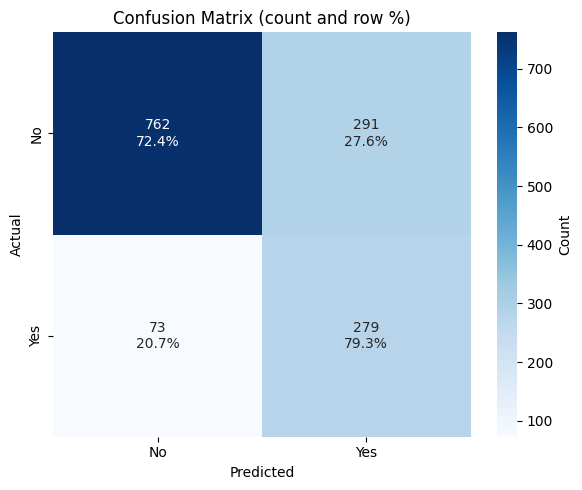

In [32]:
cm = confusion_matrix(y_test, y_test_pred)
labels = ['No', 'Yes']

cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm_percent = cm_norm * 100
annot = np.empty_like(cm).astype(object)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        annot[i, j] = f"{cm[i, j]}\n{cm_percent[i, j]:.1f}%"

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=annot, fmt='', cmap='Blues', xticklabels=labels, yticklabels=labels, cbar_kws={'label': 'Count'})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (count and row %)')
plt.tight_layout()
plt.show()

# Random_Forest

In [33]:
y_test_pred2 = best_models['Random Forest'].predict(X_test)
y_test_prob2 = best_models['Random Forest'].predict_proba(X_test)[:, 1]

In [34]:
y_test_pred2



array([1, 0, 0, ..., 0, 0, 0], shape=(1405,))

In [35]:
y_test_prob2

array([0.825, 0.335, 0.22 , ..., 0.015, 0.21 , 0.07 ], shape=(1405,))

In [36]:
from sklearn.metrics import f1_score

print(f"Accuracy : ", accuracy_score(y_test, y_test_pred2))
print(f"ROC - AUC Score : ", roc_auc_score(y_test, y_test_pred2))
print(f"Confusion Matrix : \n", confusion_matrix(y_test, y_test_pred2))

print(f"Classification Report : \n", classification_report(y_test, y_test_pred2))

print("F1 Score Random Forest:", f1_score(y_test, y_test_pred2))


Accuracy :  0.7658362989323844
ROC - AUC Score :  0.725577084952085
Confusion Matrix : 
 [[849 204]
 [125 227]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.81      0.84      1053
           1       0.53      0.64      0.58       352

    accuracy                           0.77      1405
   macro avg       0.70      0.73      0.71      1405
weighted avg       0.79      0.77      0.77      1405

F1 Score Random Forest: 0.5798212005108557


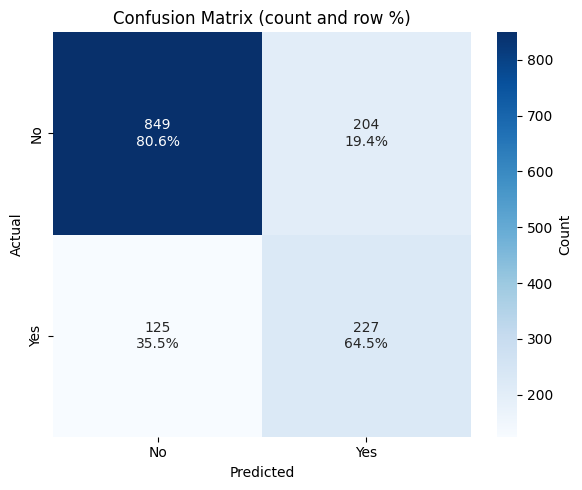

In [37]:
cm = confusion_matrix(y_test, y_test_pred2)
labels = ['No', 'Yes']

cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm_percent = cm_norm * 100
annot = np.empty_like(cm).astype(object)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        annot[i, j] = f"{cm[i, j]}\n{cm_percent[i, j]:.1f}%"

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=annot, fmt='', cmap='Blues', xticklabels=labels, yticklabels=labels, cbar_kws={'label': 'Count'})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (count and row %)')
plt.tight_layout()
plt.show()